In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the libary
data= pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

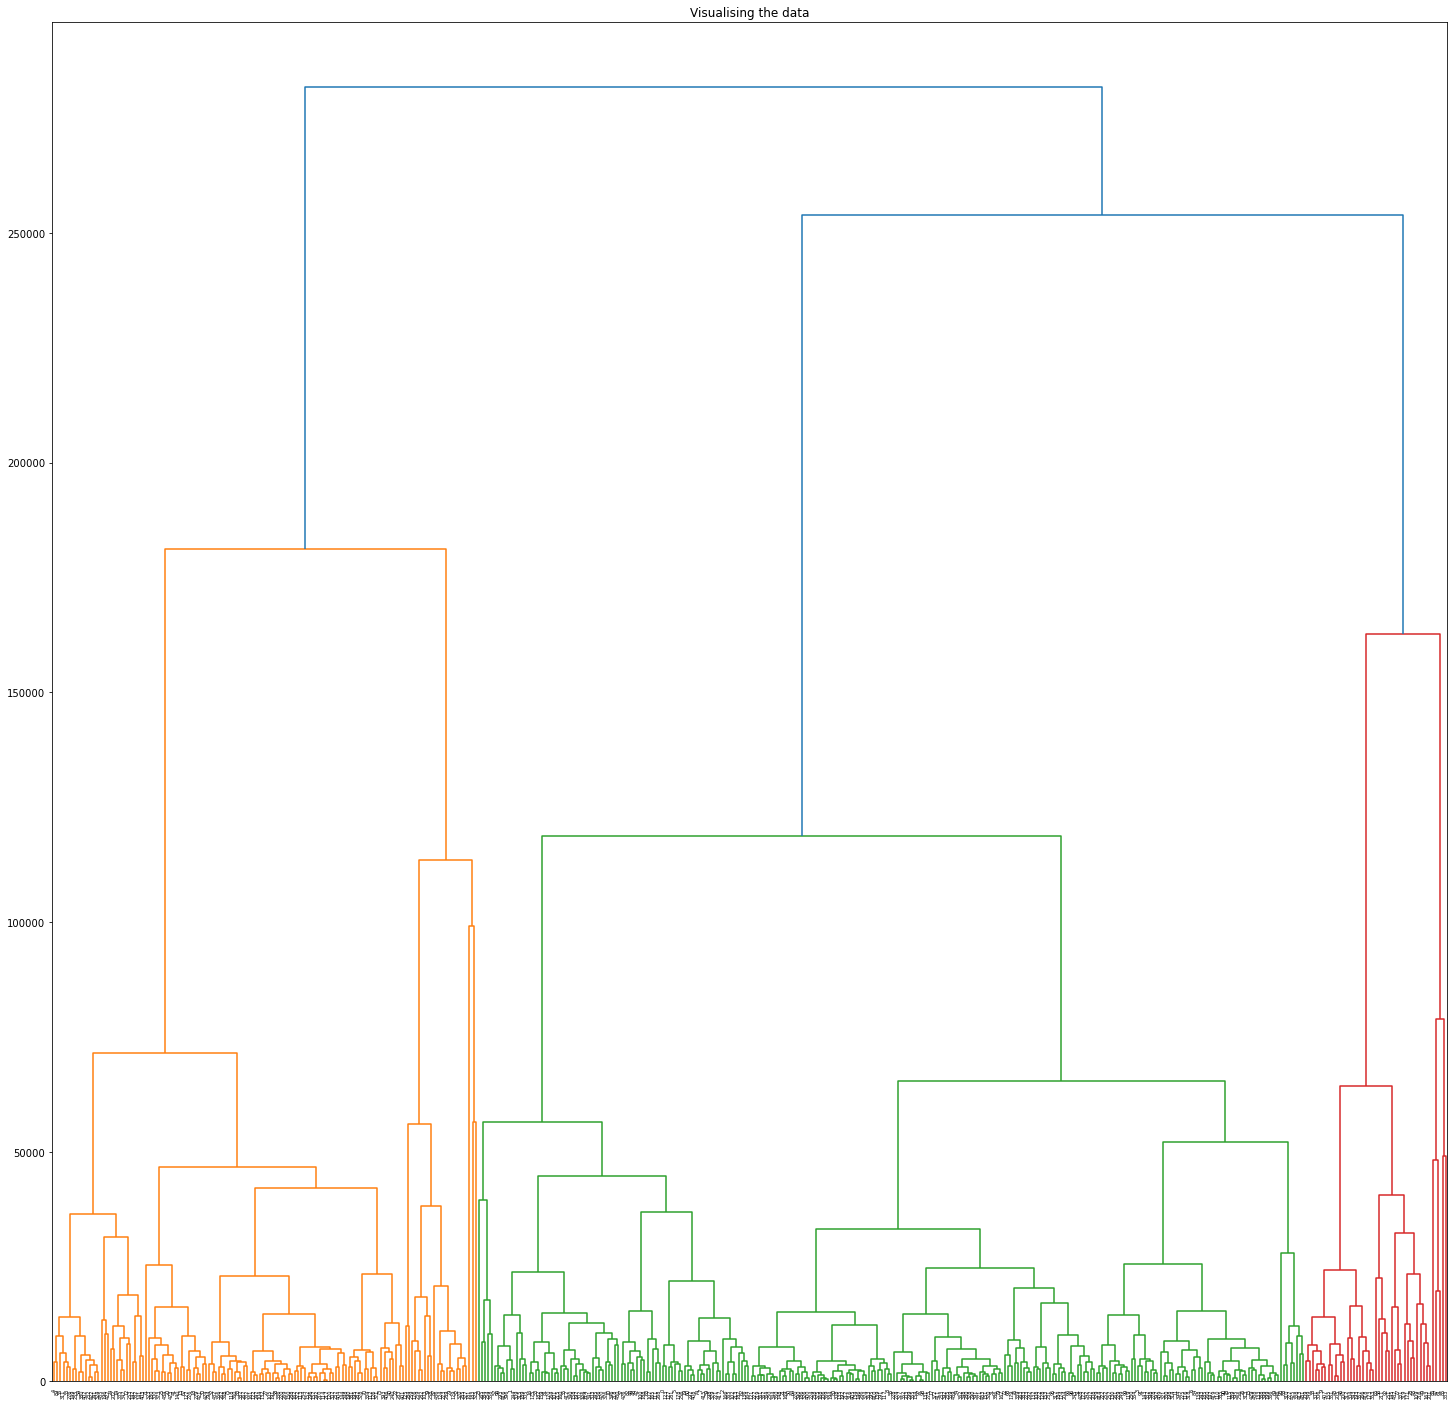

In [4]:

plt.figure(figsize =(25, 25))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

In [5]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [6]:
# Scaling the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
  
# Normalizing the data 
# follows a Gaussian distribution
data_normalized = normalize(data_scaled)
  
# Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized)

In [7]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['P1', 'P2']

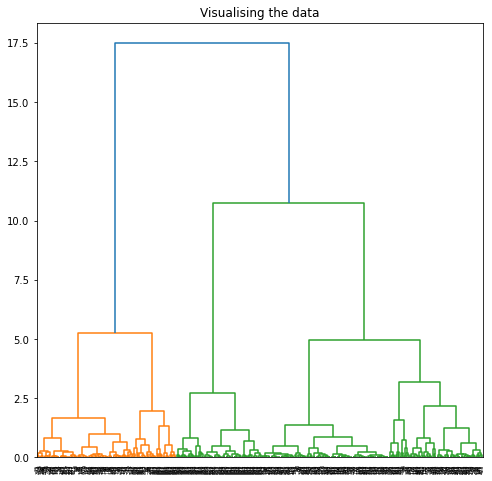

In [8]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data_principal, method ='ward')))

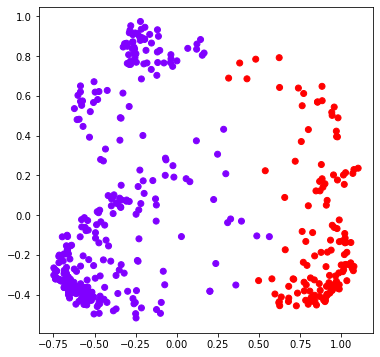

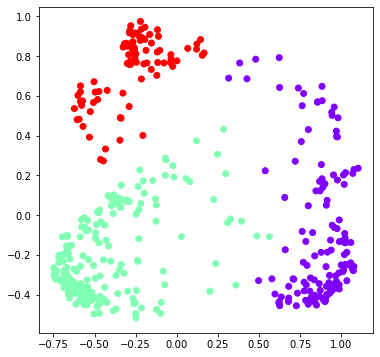

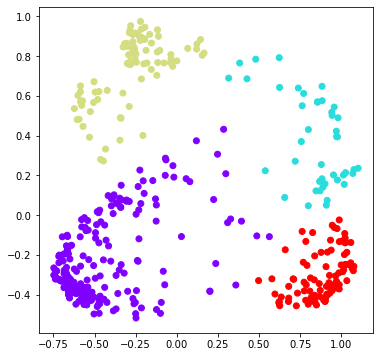

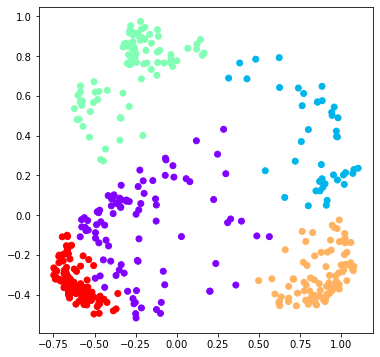

In [9]:

for i in range(2,6):
    ac2 = AgglomerativeClustering(n_clusters = i)
  
    # Visualizing the clustering
    plt.figure(figsize =(6, 6))
    plt.scatter(data_principal['P1'], data_principal['P2'], c = ac2.fit_predict(data_principal), cmap ='rainbow')
    plt.show()

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)


In [11]:
#Single-Link Hierarchical
#Single-Link: measures the shortest link

#d(S1,S2)=min(s1,s2)∈S1×S2∥s1−s2∥2

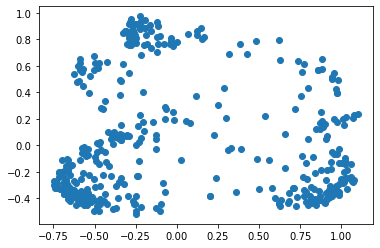

In [12]:
plt.scatter(data_principal['P1'],data_principal['P2'])

In [13]:
def single_distance(clusters ,cluster_num):
    print('first cluster | ','second cluster | ', 'distance')
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            # for each point in each cluster
            for point_id,point in enumerate(cluster): 
                # we only need to compare with clusters after the current one
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    # go through every point in this prospective cluster as well
                    for point2_id, point2 in enumerate(cluster2):
# if this distance is better than our previous best distance then we are going to overwrite it
                        if distance.euclidean(point,point2) < closest_distance: 
                            # Only used for comparing 
                            closest_distance = distance.euclidean(point,point2)
                # this will be used at the end to figure out which cluster to merge with which
                            clust_1 = cluster_id
                # this cluster will be destroyed by the end
                            clust_2 = cluster2_id+cluster_id+1
               # extend just appends the contents to the list without flattening it out
        print(clust_1,' | ',clust_2, ' | ',closest_distance)
        clusters[clust_1].extend(clusters[clust_2]) 
        # don't need this index anymore, and we have just clustered once more
        clusters.pop(clust_2) 
    return(clusters)

In [14]:

### Hierarchical clustering
def hierarchical(data, cluster_num, metric = 'single'):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['P1'], row['P2']]])
    if metric is 'single':
        return single_distance(init_clusters, cluster_num)

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-14-e92b7ad6a2ba>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if metric is 'single':


In [ ]:

clusters = hierarchical(data_principal,4)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

first cluster |  second cluster |  distance
34  |  274  |  0.000912625465980838
182  |  419  |  0.0010025454931451496
245  |  264  |  0.0015541577927378064
26  |  387  |  0.001954408222752106
283  |  375  |  0.0019612146480209574
225  |  248  |  0.0023002226060341345
122  |  162  |  0.002348606664031876
82  |  169  |  0.0025645747867995756
357  |  384  |  0.0025668217435551722
116  |  361  |  0.0026402960531597425
133  |  167  |  0.002776399787863967
135  |  280  |  0.0033489951747200683
251  |  258  |  0.0035618719099012233
78  |  383  |  0.0035696569885653065
185  |  405  |  0.003656199550114467
26  |  115  |  0.0036771323539838115
83  |  376  |  0.0037104318383260073
170  |  346  |  0.0039861128046171646
130  |  411  |  0.004167557241876512
80  |  188  |  0.004315199566219228
361  |  405  |  0.004328401881872009
1  |  53  |  0.004617441200041518
165  |  387  |  0.004637810563525996
63  |  349  |  0.004842228326866229
119  |  339  |  0.004964040297010614
96  |  97  |  0.0050415181417

189  |  194  |  0.026031111358839797
105  |  133  |  0.026053884320098163
14  |  95  |  0.026170944914761986
6  |  62  |  0.02621388713177451
14  |  26  |  0.02637675242107463
14  |  57  |  0.026553635672836085
152  |  155  |  0.026600226304818078
68  |  142  |  0.02695149052741445
16  |  70  |  0.027201914393115922
54  |  203  |  0.027244121388080363
29  |  200  |  0.027304352891549616
60  |  66  |  0.02733940798752708
1  |  9  |  0.02734235304320727
105  |  125  |  0.027357006038004877
54  |  192  |  0.02736922570829689
95  |  125  |  0.027396364252874755
3  |  69  |  0.027546343692547895
7  |  27  |  0.028064969434830403
3  |  58  |  0.02827556452340053
